In [140]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
import pylab as plt
from astrometry.libkd.spherematch import *
from astrometry.util.fits import *
import numpy as np
from astrometry.util.starutil_numpy import *
from astrometry.util.plotutils import *
from glob import glob
from collections import Counter
from IPython.core.display import HTML

In [66]:
pwd

'/Users/dstn/legacypipe/py'

In [54]:
from legacypipe.survey import LegacySurveyData
dr5 = LegacySurveyData('dr5')
segment = LegacySurveyData('segment')

In [64]:
#bricks = ['2410p050', '2410p052', '2410p070', '2410p072']
bricks = ['2410p070', '2410p072', '2410p075',
          '2413p070', '2413p072', '2413p075',
          '2415p070', '2415p072', '2415p075',
         ]

In [101]:
T = merge_tables([fits_table(dr5.find_file('tractor', brick=b)) for b in bricks])
S = merge_tables([fits_table(segment.find_file('tractor', brick=b)) for b in bricks])
T.cut(T.brick_primary)
S.cut(S.brick_primary)

In [68]:
print('DR5:', Counter(T.type))
print('Segment:', Counter(S.type))

DR5: Counter({'PSF ': 33899, 'REX ': 11355, 'EXP ': 4602, 'DEV ': 1312, 'COMP': 186})
Segment: Counter({'PSF ': 33454, 'REX ': 19195, 'EXP ': 5180, 'DEV ': 1989, 'COMP': 174})


In [77]:
T.mag_r = -2.5*(np.log10(T.flux_r) - 9)
S.mag_r = -2.5*(np.log10(S.flux_r) - 9)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


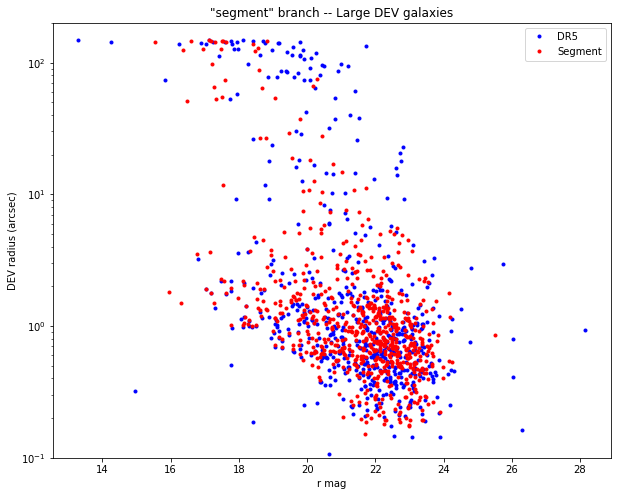

In [43]:
IT, = np.nonzero(T.type == 'DEV ')
IS, = np.nonzero(S.type == 'DEV ')
plt.plot(T.mag_r[IT], T.shapedev_r[IT], 'b.', label='DR5');
plt.plot(S.mag_r[IS], S.shapedev_r[IS], 'r.', label='Segment');
plt.xlabel('r mag');
plt.ylabel('DEV radius (arcsec)');
plt.legend()
plt.title('"segment" branch -- Large DEV galaxies');
plt.yscale('log');
plt.ylim(0.1, 200);
plt.savefig('segment-dev.png');

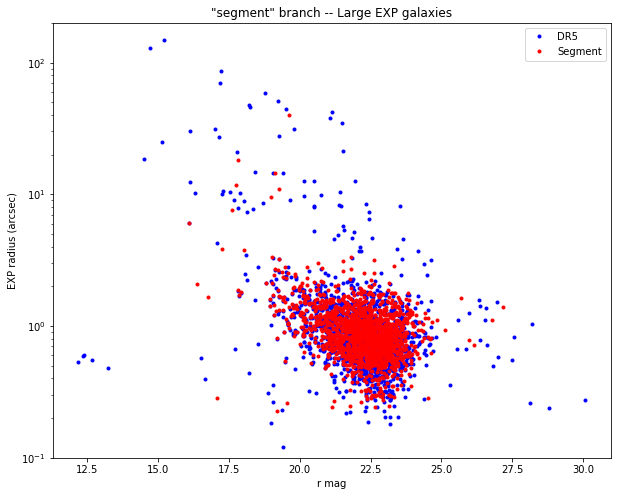

In [44]:
IT, = np.nonzero(T.type == 'EXP ')
IS, = np.nonzero(S.type == 'EXP ')
plt.plot(T.mag_r[IT], T.shapeexp_r[IT], 'b.', label='DR5');
plt.plot(S.mag_r[IS], S.shapeexp_r[IS], 'r.', label='Segment');
plt.xlabel('r mag');
plt.ylabel('EXP radius (arcsec)');
plt.legend()
plt.title('"segment" branch -- Large EXP galaxies');
plt.yscale('log');
plt.ylim(0.1, 200);
plt.savefig('segment-exp.png');

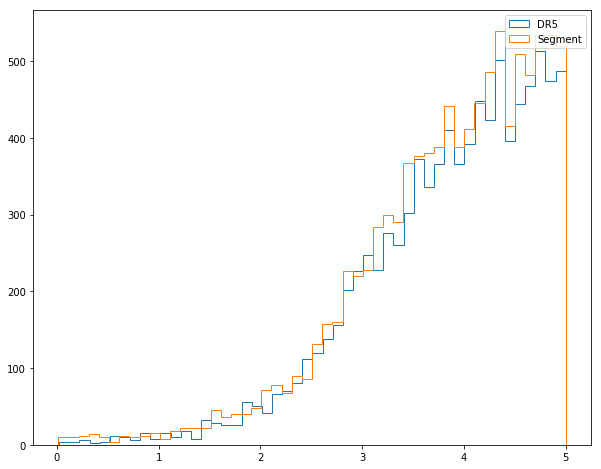

In [45]:
I,J,d1 = match_radec(T.ra, T.dec, T.ra, T.dec, 5./3600., notself=True);
I,J,d2 = match_radec(S.ra, S.dec, S.ra, S.dec, 5./3600., notself=True);
plt.hist(d1*3600., bins=50, histtype='step', label='DR5');
plt.hist(d2*3600., bins=50, histtype='step', label='Segment');
plt.legend();

In [46]:
RS = np.flatnonzero(S.ref_id)
NRS = np.flatnonzero(S.ref_id == 0)
len(RS), len(NRS)

(2352, 21369)

Counter({'PSF ': 35})

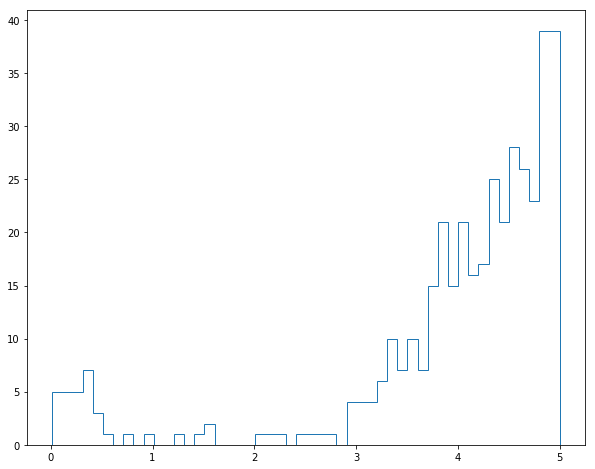

In [50]:
I,J,d = match_radec(S.ra[RS], S.dec[RS], S.ra[NRS], S.dec[NRS], 5./3600.);
plt.hist(d*3600., bins=50, histtype='step');
Counter(S.type[RS][I][d*3600<2.5])

In [52]:
Counter(S.ref_cat[RS])

Counter({'G2': 2352})

In [70]:
# Look for DR5->Segment dropouts
I,J,d = match_radec(T.ra, T.dec, S.ra, S.dec, 1./3600., nearest=True);
print(len(I), 'of', len(T), 'DR5 sources have a match')


50123 of 51354 DR5 sources have a match


In [71]:
unmatched = np.ones(len(T), bool)
unmatched[I] = False
U = np.flatnonzero(unmatched)

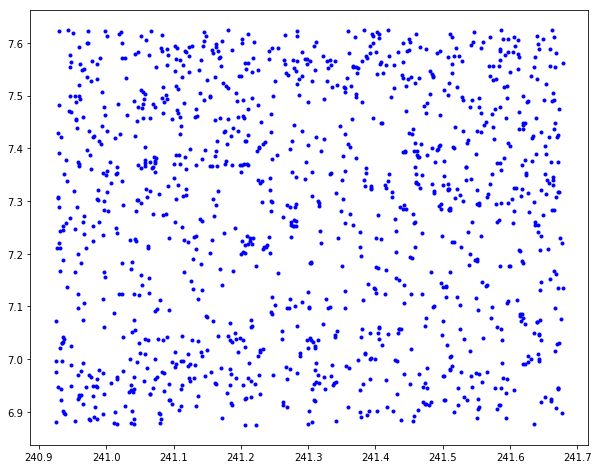

In [72]:
plt.plot(T.ra[U], T.dec[U], 'b.')

In [75]:
T[U].writeto('dr5-dropouts.fits')

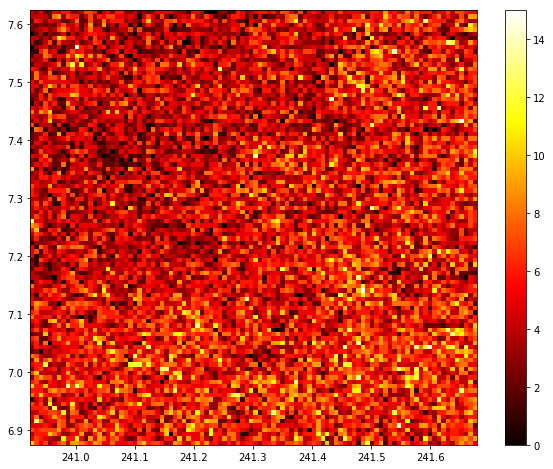

In [73]:
plothist(T.ra, T.dec);

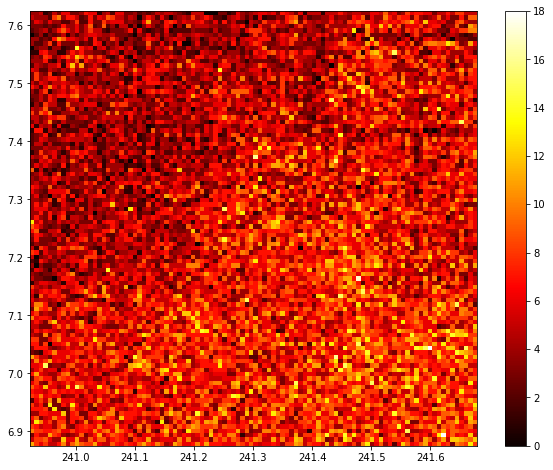

In [74]:
plothist(S.ra, S.dec);

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


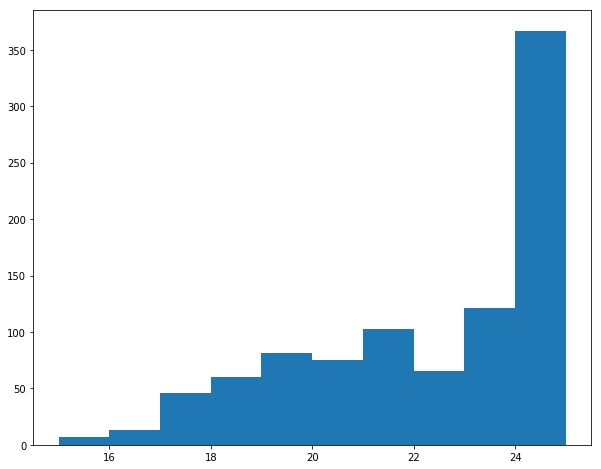

In [80]:
plt.hist(T.mag_r[U], range=(15,25));

In [81]:
T[U][T.mag_r[U] < 20].writeto('dr5-dropouts-bright.fits')

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [102]:
# Compare radii
I,J,d = match_radec(T.ra, T.dec, S.ra, S.dec, 1./3600.);
MT = T[I]
MS = S[J]

In [103]:
IE = np.flatnonzero((MT.type == 'EXP ') * (MS.type == 'EXP '))
len(IE)

3580

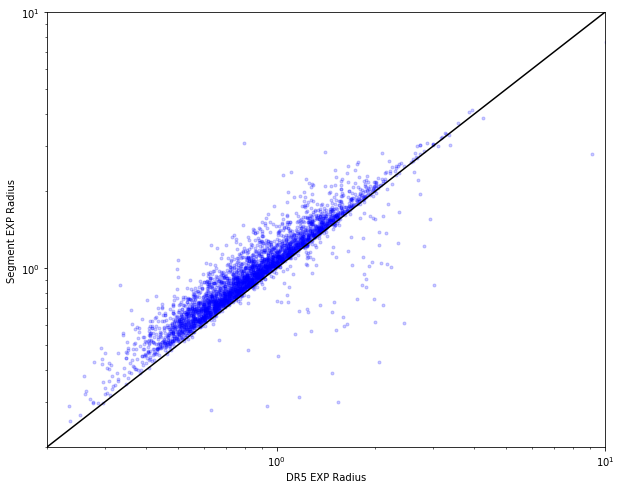

In [105]:
plt.loglog(MT.shapeexp_r[IE], MS.shapeexp_r[IE], 'b.', alpha=0.2);
plt.plot([0.1, 100], [0.1, 100], 'k-')
plt.axis([0.2, 10, 0.2, 10]);
plt.xlabel('DR5 EXP Radius')
plt.ylabel('Segment EXP Radius');

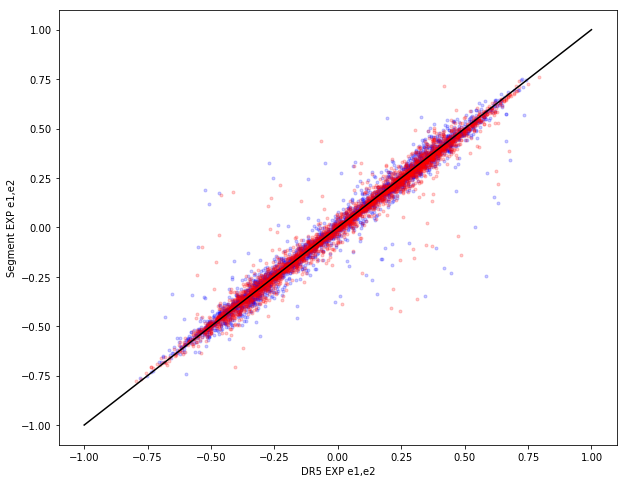

In [109]:
plt.plot(MT.shapeexp_e1[IE], MS.shapeexp_e1[IE], 'b.', alpha=0.2);
plt.plot(MT.shapeexp_e2[IE], MS.shapeexp_e2[IE], 'r.', alpha=0.2);
plt.plot([-1, 1], [-1,1], 'k-')
#plt.axis([0.2, 10, 0.2, 10]);
plt.xlabel('DR5 EXP e1,e2')
plt.ylabel('Segment EXP e1,e2');

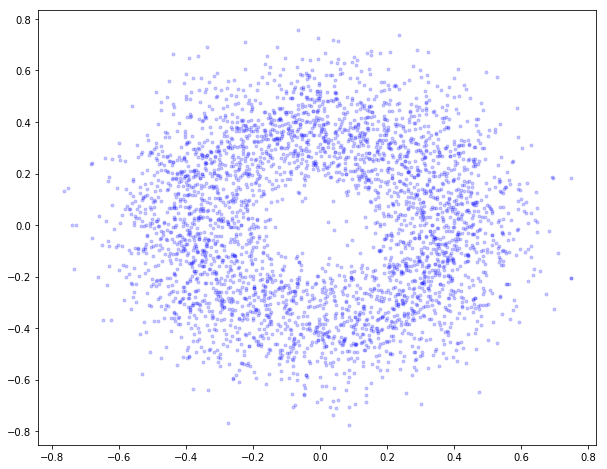

In [110]:
plt.plot(MS.shapeexp_e1[IE], MS.shapeexp_e2[IE], 'b.', alpha=0.2);


In [146]:
def show(M):
    html = '<table>'
    html += '<tr><th>DR5 Resid</th><th>DR5</th><th>Data</th><th>DR7-segment</th><th>DR7-segment Resid</th>'
    for j in range(len(M)):
        html += '<tr>'
        html += '<td><img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=decals-dr5-resid&ra=%.4f&dec=%.4f&pixscale=0.1&size=100" width="100" height="100"></td>' % (M.ra[j], M.dec[j])
        html += '<td><img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=decals-dr5-model&ra=%.4f&dec=%.4f&pixscale=0.1&size=100" width="100" height="100"></td>' % (M.ra[j], M.dec[j])
        html += '<td><a href="http://legacysurvey.org/viewer-dev/?layer=decals-dr7&ra=%.4f&dec=%.4f&zoom=15">' % (M.ra[j], M.dec[j])
        html += '<img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=decals-dr7&ra=%.4f&dec=%.4f&pixscale=0.1&size=100" width="100" height="100"></a></td>' % (M.ra[j], M.dec[j])
        html += '<td><img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=decals-dr7-model&ra=%.4f&dec=%.4f&pixscale=0.1&size=100" width="100" height="100"></td>' % (M.ra[j], M.dec[j])
        html += '<td><img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=decals-dr7-resid&ra=%.4f&dec=%.4f&pixscale=0.1&size=100" width="100" height="100"></td>' % (M.ra[j], M.dec[j])
        html += '</tr>'
    html += '</table>'
    return html

In [147]:
K = IE[np.flatnonzero((np.abs(MS.shapeexp_e1[IE] - 0) < 0.1) *
                      (np.abs(MS.shapeexp_e2[IE] - 0.4) < 0.1) *
                      (MS.shapeexp_r[IE] < 1.5) *
                      (MS.shapeexp_r[IE] > 1.0)
                     )]
K = K[np.argsort(-MS.flux_r[K])]
len(K)

47

In [148]:
HTML(show(MS[K[:20]]))

In [149]:
K = IE[np.flatnonzero((np.abs(np.hypot(MS.shapeexp_e1[IE], MS.shapeexp_e2[IE]) - 0.55) < 0.05) *
                      (MS.shapeexp_r[IE] < 1.5) *
                      (MS.shapeexp_r[IE] > 1.0)
                     )]
K = K[np.argsort(-MS.flux_r[K])]
len(K)

231

In [150]:
HTML(show(MS[K[:50]]))

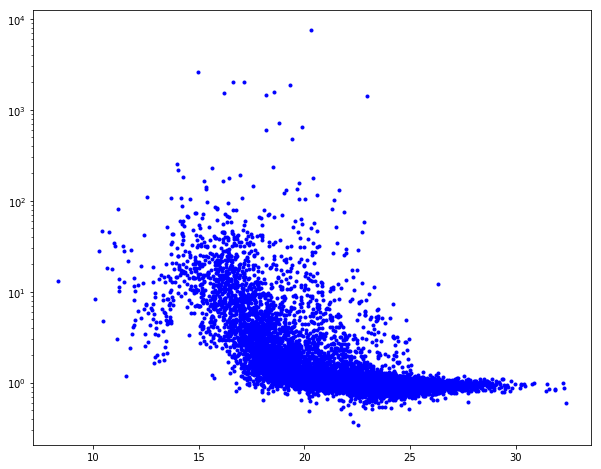

In [83]:
plt.semilogy(S.mag_r, S.rchisq_r, 'b.');

In [84]:
S[S.rchisq_r > 500].writeto('bad-rchisq.fits')

In [90]:
MT = merge_tables([fits_table(dr5.find_file('all-models', brick=b)) for b in bricks])
MS = merge_tables([fits_table(segment.find_file('all-models', brick=b)) for b in bricks])
#MT.cut(MT.brick_primary)
#MS.cut(MS.brick_primary)

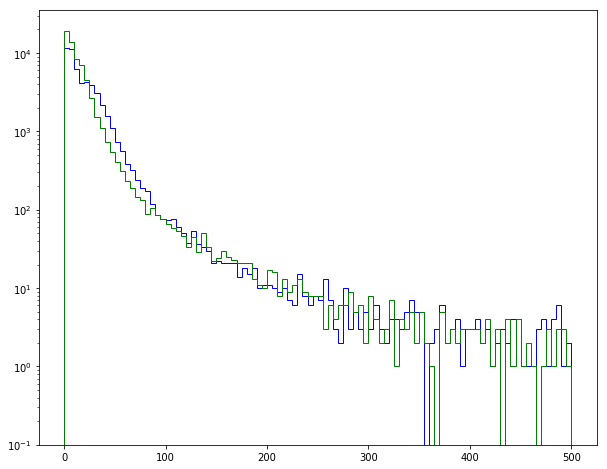

In [91]:
plt.hist(MT.cpu_source, bins=100, range=(0,500), log=True, histtype='step', color='b');
plt.hist(MS.cpu_source, bins=100, range=(0,500), log=True, histtype='step', color='g');